# Lecture 3 and Lab Ideas

## Topics we still need to cover
 - API for USDA data
 - API for weather data
 - Mapping
 
For more detail on python please see the Purdue DataMine web link: <a href="https://thedatamine.github.io/the-examples-book/python.html" target="_blank">Data Mine on Python</a>

Also see: <a href="https://docs.python.org/3/" target="_blank">Python 3.9.1 Documentation</a>

In [1]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# Uses python's string format method.
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('Data3')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/jvk/Documents/Teaching/2020-HEC
Current working directory: /Users/jvk/Documents/Teaching/2020-HEC/Data3


## Simple Mapping?

In [2]:
my_file_name = 'cities-and-towns-of-the-united-states.csv'
my_new_file_name = 'Wrangled-' + my_file_name

# Open the file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line

print(line)
fields = line.split(';')
print(len(fields))
print(fields)
print()

for i in range(20):
    line = fin.readline()
    fields = line.split(';')
    print(len(fields))
    print(fields)
    print()

fin.close()

Geo Point;Geo Shape;GNIS ID;ANSICODE;FEATURE;FEATURE2;NAME;POP 2010;COUNTY;COUNTY FIPS;STATE;STATE FIPS;LATITUDE;LONGITUDE;PopPlLat;PopPlLong;ELEV IN M;ELEV IN FT

18
['Geo Point', 'Geo Shape', 'GNIS ID', 'ANSICODE', 'FEATURE', 'FEATURE2', 'NAME', 'POP 2010', 'COUNTY', 'COUNTY FIPS', 'STATE', 'STATE FIPS', 'LATITUDE', 'LONGITUDE', 'PopPlLat', 'PopPlLong', 'ELEV IN M', 'ELEV IN FT\n']

18
['44.2998540717,-120.834480347', '"{""type"": ""Point"", ""coordinates"": [-120.83448034701922, 44.299854071684514]}"', '1154317', '2411494', 'Civil', 'County Seat', 'Prineville', '9253', 'Crook', '013', 'OR', '41', '44.2998485', '-120.8344664', '44.2998485', '-120.8344664', '878', '2881\n']

18
['41.7354923486,-111.834399861', '"{""type"": ""Point"", ""coordinates"": [-111.83439986101921, 41.73549234864257]}"', '1442849', '2410856', 'Civil', 'County Seat', 'Logan', '48174', 'Cache', '005', 'UT', '49', '41.7354862', '-111.834388', '41.7354862', '-111.834388', '1382', '4534\n']

18
['39.3688793269,-107.

In [3]:
fin = open(my_file_name, "r")

# This creates the file and, if aleady exists, erases any 
# old content
fout = open(my_new_file_name, "w")
fout.close() 

# Read the first line containing header and split the line 
# string into fields on the comma separator. This returns a 
# list where each list element is one of comma delimited 
# strings. For the .csv files here there will be 21 
# substrings in each line. They are numbered from 0 to 20. 
# We want to retain numbers
# 4 ('FEATURE'), 5 ('FEATURE2'), 6 ('NAME'), 8 ('COUNTY'), 
# 9 ('COUNTY FIPS'), 10 ('STATE'), 11 ('STATE FIPS'), 
# 12 ('LATITUDE'), 13('LONGITUDE')
#
# The code below creates the header for the new csv file

line = fin.readline()
fin.close()

fields = line.split(';')
newline = fields[4] + ',' + fields[5] + ',' + fields[6] + ','
newline = newline + fields[8] + ',' + fields[9] + ','
newline = newline + fields[10] + ',' +fields[11] + ','
newline = newline + fields[12] + ',' +fields[13]

fout = open(my_new_file_name, "a")
print(newline, file=fout)
fout.close() 

# Now I want to go through the input csv line by line deleting 
# the superfluous fields and appending the new lines to the 
# "wrangled" file.

fin = open(my_file_name, "r")
fin.readline() # Read the header line and move to 2nd line

f = set()
f2 = set()
state = set()

fout = open(my_new_file_name, "a")

for line in fin:
    fields = line.split(';')
    newline = fields[4] + ',' + fields[5] + ',' + fields[6] + ','
    newline = newline + fields[8] + ',' + fields[9] + ','
    newline = newline + fields[10] + ',' +fields[11] + ','
    newline = newline + fields[12] + ',' +fields[13]    
    print(newline, file=fout)
    f.add(fields[4])
    f2.add(fields[5])
    state.add(fields[10])

fin.close()
fout.close()

In [4]:
f

{'Census', 'Civil', 'Locale', 'Place', 'Populated Place'}

In [5]:
f2

{'-999',
 'County Seat',
 'National Capital',
 'State Capital',
 'State Capital County Seat'}

In [6]:
print(state)

{'PR', 'WI', 'FL', 'GA', 'ME', 'KS', 'CA', 'SC', 'DE', 'IA', 'DC', 'MO', 'WY', 'MS', 'RI', 'KY', 'TX', 'MD', 'WA', 'AR', 'AL', 'OH', 'NE', 'MI', 'NC', 'NM', 'CT', 'MT', 'IN', 'PA', 'OK', 'NH', 'MN', 'NV', 'NJ', 'HI', 'UT', 'ID', 'IL', 'TN', 'VI', 'NY', 'ND', 'MA', 'SD', 'WV', 'AZ', 'VA', 'LA', 'CO', 'AK', 'OR', 'VT'}


In [7]:
fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line
k = 0

for line in fin:
    fields = line.split(',')
    T1 = fields[1] == 'State Capital County Seat'
    T2 = fields[1] == 'County Seat'
    if T1 or T2:
        k = k + 1
        
fin.close()

fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line
        
x = np.zeros(k)
y = np.zeros(k)

l = 0
for line in fin:
    fields = line.split(',')
    T1 = fields[1] == 'State Capital County Seat'
    T2 = fields[1] == 'County Seat'
    if T1 or T2:
        x[l] = float(fields[8])
        y[l] = float(fields[7])
        l = l + 1

fin.close()


In [8]:
print(x)
print(y)


[-120.8344664  -111.834388   -105.0166498  ... -103.5993477   -95.31316132
  -72.4475994 ]
[44.2998485 41.7354862 39.613321  ... 31.7051291 36.3008558 43.989788 ]


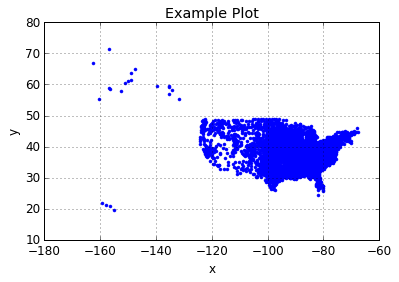

In [9]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(x, y, '.')
plt.title("Example Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

### Playing with an API

In [1]:
import requests

In [2]:

response = requests.get("https://api.thedogapi.com/")
response.text

'{"message":"The Dog API"}'

In [3]:
response = requests.get("https://api.thedogapi.com/v1/breeds")
response.text

'[{"weight":{"imperial":"6 - 13","metric":"3 - 6"},"height":{"imperial":"9 - 11.5","metric":"23 - 29"},"id":1,"name":"Affenpinscher","bred_for":"Small rodent hunting, lapdog","breed_group":"Toy","life_span":"10 - 12 years","temperament":"Stubborn, Curious, Playful, Adventurous, Active, Fun-loving","origin":"Germany, France","reference_image_id":"BJa4kxc4X","image":{"id":"BJa4kxc4X","width":1600,"height":1199,"url":"https://cdn2.thedogapi.com/images/BJa4kxc4X.jpg"}},{"weight":{"imperial":"50 - 60","metric":"23 - 27"},"height":{"imperial":"25 - 27","metric":"64 - 69"},"id":2,"name":"Afghan Hound","country_code":"AG","bred_for":"Coursing and hunting","breed_group":"Hound","life_span":"10 - 13 years","temperament":"Aloof, Clownish, Dignified, Independent, Happy","origin":"Afghanistan, Iran, Pakistan","reference_image_id":"hMyT4CDXR","image":{"id":"hMyT4CDXR","width":606,"height":380,"url":"https://cdn2.thedogapi.com/images/hMyT4CDXR.jpg"}},{"weight":{"imperial":"44 - 66","metric":"20 - 30"

In [4]:
type(response.text)

str

In [5]:
API_KEY="E5383129-F3D7-348F-BB87-4A6EA2433E6D"

In [8]:
URL1a="http://quickstats.nass.usda.gov/api/get_counts/?key="
URL1b=API_KEY
URL1c="&commodity_desc=WHEAT&year=1959&state_alpha=CO"
URL1 = URL1a + URL1b + URL1c

In [9]:
response = requests.get(URL1)
response.text

'{"count":2946}'

In [13]:
URL2a="http://quickstats.nass.usda.gov/api/get_counts/?key="
URL2b=URL1b
URL2c="&commodity_desc=WHEAT&year=1959&state_alpha=CO"
URL2 = URL2a + URL2b + URL2c
response = requests.get(URL2)
response.text



'{"count":2946}'

In [16]:
URL3a="http://quickstats.nass.usda.gov/api/api_GET/?key="
URL3b=URL1b
URL3c="&commodity_desc=WHEAT&year=1960&state_alpha=CO&format=CSV"

URL3 = URL3a + URL3b + URL3c
response = requests.get(URL3)
print(response.text)



"source_desc","sector_desc","group_desc","commodity_desc","class_desc","prodn_practice_desc","util_practice_desc","statisticcat_desc","unit_desc","short_desc","domain_desc","domaincat_desc","agg_level_desc","state_ansi","state_fips_code","state_alpha","state_name","asd_code","asd_desc","county_ansi","county_code","county_name","region_desc","zip_5","watershed_code","watershed_desc","congr_district_code","country_code","country_name","location_desc","year","freq_desc","begin_code","end_code","reference_period_desc","week_ending","load_time","Value","CV (%)"
"SURVEY","CROPS","FIELD CROPS","WHEAT","ALL CLASSES","ALL PRODUCTION PRACTICES","ALL UTILIZATION PRACTICES","AREA HARVESTED","ACRES","WHEAT - ACRES HARVESTED","TOTAL","NOT SPECIFIED","AGRICULTURAL DISTRICT","08","08","CO","COLORADO","10","NORTHWEST AND MOUNTAIN","","","","","","00000000","","","9000","UNITED STATES","COLORADO, NORTHWEST AND MOUNTAIN","1960","ANNUAL","00","00","YEAR","","2012-01-01 00:00:00","59,960",""
"SURVEY","CROP

In [15]:
type(response.text)

str

In [ ]:
yd = yd.replace('\n', '')

In [ ]:
my_file_name = 'Wrangled-WheatYields.csv'

# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line to move past header 

# Initialize some empty sets.
years = set()
state_county_pairs = set()

# The year values are located in the first column (index = 0)
# The state values are in the second column (index = 1)
# The county values are in the fourth column (index = 3)
for line in fin:
    fields = line.split(',')
    yr = fields[0].replace('"', '')
    years.add(yr)
    s = fields[1].replace('"', '')
    c = fields[3].replace('"', '')
    state_county_pairs.add(s + '-' + c)
                      
fin.close()

# Convert to lists
years = list(years)
state_county_pairs = list(state_county_pairs)

# The variable "isdata" is initialized with zeros. When a one appears
# at a particular row and column it indicates that the corresponding
# state-county pair and year has yield data.
isdata = np.zeros((len(state_county_pairs), len(years)))

# The variable "ydata" is also initialized with zeros.
ydata = np.zeros((len(state_county_pairs), len(years)))

# Sort the years and state_county_pairs lists. This is done so that we
# can refer to the data in the numpy array and have the order there
# correspond to the state-county pair and year of interest.
years.sort()
state_county_pairs.sort()

## Populating data into `isdata` and `ydata`
The next cell reads data from the `Wrangled-WheatYields.csv` file and populates the numpy arrays `isdata` and `ydata`. Remember these two arrays were initialized as all zeros.

Below we will use the `index()` method, which returns the numeric index of the first occurrence of an item in a list. We made our `state_county_pairs` and `years` lists to have unique items.

In [ ]:
# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line to move past header 

# The year values are located in the first column (index = 0)
# The state values in the second column (index = 1). County
# values in the fourth column (index = 3). County average yield
# values in the sixth column (index = 5).
#
# Note how we use the python method .index in order to properly
# align the data values in the numpy arrays with the list values
# in years and state_county_pairs.

for line in fin:
    fields = line.split(',') #Separate line into individual items
    yr = fields[0].replace('"', '') #Delete extra double quotes
    s = fields[1].replace('"', '') #Delete extra double quotes
    c = fields[3].replace('"', '') #Delete extra double quotes
    s_c = s + '-' + c
    rindex = state_county_pairs.index(s_c)
    cindex = years.index(yr)
    isdata[rindex, cindex] = 1 #Insert "1" into isdata in proper place
    yd = fields[5]
    yd = yd.replace('\n', '') #Delete newline character at the end
    yd = yd.replace('"', '') #Delete extra double quotes
    ydata[rindex, cindex] = float(yd) #Insert a numeric yield value in the proper place
                      
fin.close()

In [ ]:
# Here I am manually setting the state_county pairs of interest 
# according to the figure above

JVK_sc_pairs = ['COLORADO-WASHINGTON',
 'COLORADO-SEDGWICK',
 'COLORADO-PHILLIPS',
 'COLORADO-YUMA',
 'NEBRASKA-DUNDY',
 'NEBRASKA-HITCHCOCK',
 'NEBRASKA-RED WILLOW',
 'NEBRASKA-FURNAS',
 'NEBRASKA-HARLAN',
 'NEBRASKA-FRANKLIN',
 'NEBRASKA-WEBSTER',
 'NEBRASKA-NUCKOLLS',
 'NEBRASKA-THAYER',
 'NEBRASKA-JEFFERSON',
 'NEBRASKA-GAGE',
 'NEBRASKA-PAWNEE',
 'KANSAS-CHEYENNE',
 'KANSAS-RAWLINS',
 'KANSAS-DECATUR',
 'KANSAS-NORTON',
 'KANSAS-PHILLIPS',
 'KANSAS-SMITH',
 'KANSAS-JEWELL',
 'KANSAS-REPUBLIC',
 'KANSAS-WASHINGTON',
 'KANSAS-MARSHALL',
 'KANSAS-NEMAHA',
 'KANSAS-BROWN']

# Getting the data for the restricted state_county pairs set ...
# In the code block below we want to create a list containing 
# the indices from the entire collection of state_county_pairs 
# which correspond to the above restricted set of state_county_pairs

rindex = []
for sc in state_county_pairs:
    if sc in JVK_sc_pairs:
        rindex.append(state_county_pairs.index(sc))

# For this restricted set of state_county pairs, find which 
# years have data ...
all = np.ones(len(years))

for i in rindex:
    all = all*isdata[i,:]

# Find the corresponding years
yrs = []
i = 0
for y in years:
    if all[i] > 0:
        yrs.append(y)
    i = i + 1

# Now we could plot a time series of county averages for 
# this set of state-county pairs and this set of years 
# just to see the trends. Note that there are still two missing 
# years (1972 and 2002) but we will ignore that ...

# This creates the column index set corresponding to the years 
# for which data is available
cindex = []
for y in years:
    if y in yrs:
        cindex.append(years.index(y))

# Select a smaller array with continguous data ...
# Out of the large array of size 972 x 79 containing 
# county average yield data over various years we want 
# to extract the smaller 28 x 36 array containing county 
# average yield data for our selected state, county pairs 
# of interest and our selected years of interest.

# We have to do this in two steps. First we select the 28 rows 
# corresponding to the counties of interest
select_ydata_temp = ydata[rindex,:]

# Then from that we select the 36 years desired
select_ydata = select_ydata_temp[:,cindex]

# Plot the individual county average yields on the same axis.

fig = plt.figure()
plt.style.use('classic')

for k in range(select_ydata.shape[0]):
    plt.plot(select_ydata[k,:])
    
plt.title("County Average Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()

# As applied here when we compute the mean and standard 
# deviation it does so over the state_county_pairs in the 
# array `select_ydata` and returns a mean and standard 
# deviation which are functions of year.

select_ydata_mean = np.mean(select_ydata,axis=0)
select_ydata_std = np.std(select_ydata,axis=0)

# Show the mean and std on the same axis
upper = select_ydata_mean + select_ydata_std
lower = select_ydata_mean - select_ydata_std
plt.plot(select_ydata_mean,'b*')
plt.plot(select_ydata_std,'r+')
plt.plot(upper,'b_')
plt.plot(lower,'b_')


plt.title("Mean (*) and Std (+) Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.style.use('classic')

plt.grid()


# First lets fit a line to the mean over the state-county pairs of 
# interest and see how that varies over time. The items below 
# correspond directly to the entries in the LS notes above.

y = select_ydata_mean
N = len(y)
x = range(N) # Remember we are using years starting from 0 in 1970
xy = np.multiply(x,y)
xx = np.multiply(x,x)
xsum = sum(x)
ysum = sum(y)
xxsum = sum(xx)
xysum = sum(xy)

A = np.zeros((2,2))
A[0,0] = N
A[0,1] = xsum
A[1,0] = xsum
A[1,1] = xxsum

b = np.zeros(2)
b[0] = ysum
b[1] = xysum

z = np.linalg.solve(A, b)
print(z)

# Now plot the best fit line on top of the data
fig = plt.figure()
plt.style.use('classic')
plt.plot(x,y,'*')
plt.title("Mean of Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()
yy = z[0] + z[1]*x
plt.plot(x,yy)

# Summary: See that the mean of the yields has increased 
# from about 35 bu/acre in 1970 to a little over 40 bu/acre 
# in 2005. The rate of increase is the slope parameter, which 
# here is found to be about 0.15 bu/acre per year.

# With a for loop ...
fig = plt.figure()
plt.style.use('classic')
plt.title("Mean of Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()

for k in range(28):
    y = select_ydata[k,:]
    N = len(y)
    x = range(N) # Remember we are years starting from 0
    xy = np.multiply(x,y)
    xx = np.multiply(x,x)
    xsum = sum(x)
    ysum = sum(y)
    xxsum = sum(xx)
    xysum = sum(xy)

    A = np.zeros((2,2))
    A[0,0] = N
    A[0,1] = xsum
    A[1,0] = xsum
    A[1,1] = xxsum

    b = np.zeros(2)
    b[0] = ysum
    b[1] = xysum

    z = np.linalg.solve(A, b)

    # Now plot the best fit line on top of the data
    plt.plot(x,y,'.')
    yy = z[0] + z[1]*x
    plt.plot(x,yy)


In [ ]:
print(select_ydata_mean)

In [ ]:
x = select_ydata[0,::2]
y = select_ydata[0,1::2]

In [ ]:
for i in range(select_ydata.shape[0]):
    x = select_ydata[i,::2]
    y = select_ydata[i,1::2]
    plt.plot(x,y,'.')
    
plt.title("Yield in Even Years vs. Yield in Odd Years")
plt.xlabel("Yield (bu/acre)")
plt.ylabel("Yield (bu/acre)")
plt.style.use('seaborn-whitegrid')


In [ ]:
x = select_ydata[0,::2]
y = select_ydata[0,1::2]
plt.plot(x,y,'.')
    
plt.title("Yield in Even Years vs. Yield in Odd Years")
plt.xlabel("Yield (bu/acre)")
plt.ylabel("Yield (bu/acre)")
plt.style.use('seaborn-whitegrid')



In [ ]:
m = int(select_ydata.shape[1]/2)
n = int(select_ydata.shape[0])
z = np.zeros((2,n*m))

for i in range(n):
    ztmp = z[:,i*m:(i+1)*m]
    ztmp[0,:] = select_ydata[i,::2]
    ztmp[1,:] = select_ydata[i,1::2]
    
mu = np.mean(z, axis=1)
munew = mu[:, np.newaxis]
ztilde = z - munew

Cov = np.matmul(ztilde,ztilde.transpose()) / (n*m)
    

In [ ]:
Cov

In [ ]:
ztilde.shape

In [ ]:
ztilde.transpose()

Can we compare or correlate the wheat yield productivity to cash rents by county?
For cash rent data: <a href="https://quickstats.nass.usda.gov" target="_blank">Quick Stats</a> and select the following radio buttons:
survey -> economicis -> expenses -> rent -> rent,cash,cropland,non-irrigated - expense, measured in $ / acre -> county -> 2008

Then click on the get data button and a table appears. This table can be downloaded to a .csv file with a long random-looking string as a name.

In [ ]:
# Change the current working directory
os.chdir('Data')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

In [ ]:
# Enter the file name for the .csv which you have downloaded.

my_file_name = input('Enter a filename that you want to open: ')

In [ ]:
my_file_name

In [ ]:
# Open the file for reading only and print the first few lines. As written
# the first 6 lines will be printed.

fin = open(my_file_name, "r")

for i in range(6):
    line = fin.readline()
    print(line, end='')

fin.close()


Clearly if we were wanting to use the .split method from before there are a number of superfluous commas to worry about. The commas to split on, however, are always surrounded by double quotes. Perhaps this can help.

In [ ]:
# Lets examine the header line first

fin = open(my_file_name, "r")

line = fin.readline()
fields = line.split(',')

fin.close()


In [ ]:
fields

What is wanted is: 'State',
 'State ANSI','County',
 'County ANSI','Value', ... the field indices are 5, 6, 9, 10, 19

In [ ]:
line = fields[5] + ',' + fields[6] + ',' + fields[9] + ',' + fields[10] + ',' + fields[19]

In [ ]:
line

In [ ]:
# Lets examine the second line

fin = open(my_file_name, "r")

line = fin.readline()
line = fin.readline()
fields = line.split('","')

fin.close()


In [ ]:
fields

Coresponding to the header line we want the fields indexed by 5, 6, 9, 10, 19

In [ ]:
my_new_file_name = 'Wrangled' + my_file_name
my_new_file_name

In [ ]:
fields

In [ ]:
import requests

# Mapping

Note that the data set also contains some numeric representations for the state and the counties. If we wanted to create a map or a spatial plot of the county average data, these may be useful.

In the USDA data there are columns titled "State ANSI" and "County ANSI". With a little searching we find they are related to a concept called FIPS codes, which stands for Federal Information Processing Standards, promulgated by the National Institute of Standards and Technology (NIST).

County level FIPS codes are 5 digits, the first two identify the state, and the last three identify the county. The mapping from State ANSI and County ANSI to FIPS is trivial. State ANSI is one or two digits and County ANSI is one to three digits and they map directly to the FIPS values.

Our first step in mapping is to transform the ANSI numbers to county level FIPS.

In [ ]:
# Open the wrangled file.

fin = open(my_new_file_name, "r")
line = fin.readline() #Read the first line to move past the header   

y = np.array([]) #Initialize an empty numpy array
fips = np.array([]) #ditto

# State ANSI is in field position 1 and the county ANSI is in field
# position 3
for line in fin:
    fields = line.split(',')
    s1 = fields[1]
    s2 = fields[3]
    if len(s1) == 1:
        s1 = '0' + s1  
    if len(s2) == 1:
        s2 = '00' + s2
    elif len(s2) == 2:
        s2 = '0' + s2 
    s = s1 + s2
    fips = np.append(fips, int(s))
    s3 = fields[4]
    s3 = s3.replace('\n', '') #Deletes the end character
    y = np.append(y, float(s3))
                      
fin.close()



In [ ]:
y

In [ ]:
fips

For mapping the place to go is https://public.opendatasoft.com/explore/embed/dataset/us-county-boundaries/table/ ....
There I can create the spreadsheet I desire state-by-state which is a bit too tedious. There is also an API, which I do not currently know how to use.

Another thing to do would be to go back to NASS and use the API I learned in the previous class. Here possibly get data for

Colorado over the years to compare Colorado counties, including information about cash rents or land values ... or do the whole nation on cash rents for 2007

One useful skill would be to explain how to understand these APIs for example the opensoft one is very confusing. Seems one needs to understand something of databases.

## Simple Mapping?

In [ ]:
my_file_name = 'cities-and-towns-of-the-united-states.csv'

# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line

print(line)
fields = line.split(';')
print(len(fields))
print(fields)
print()

for i in range(20):
    line = fin.readline()
    fields = line.split(';')
    print(len(fields))
    print(fields)
    print()

fin.close()




In [ ]:
# Initialize some empty sets.
years = set()
state_county_pairs = set()

# The year values are located in the first column (index = 0)
# The state values are in the second column (index = 1)
# The county values are in the fourth column (index = 3)
for line in fin:
    fields = line.split(',')
    yr = fields[0].replace('"', '')
    years.add(yr)
    s = fields[1].replace('"', '')
    c = fields[3].replace('"', '')
    state_county_pairs.add(s + '-' + c)
                      
fin.close()

# Convert to lists
years = list(years)
state_county_pairs = list(state_county_pairs)

# The variable "isdata" is initialized with zeros. When a one appears
# at a particular row and column it indicates that the corresponding
# state-county pair and year has yield data.
isdata = np.zeros((len(state_county_pairs), len(years)))

# The variable "ydata" is also initialized with zeros.
ydata = np.zeros((len(state_county_pairs), len(years)))

# Sort the years and state_county_pairs lists. This is done so that we
# can refer to the data in the numpy array and have the order there
# correspond to the state-county pair and year of interest.
years.sort()
state_county_pairs.sort()